In [31]:
!pip install scikit-learn --upgrade
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data reading

### 1.1 Prediction df

In [32]:
# Step 1: Extract Sheet ID and Sheet name from the link
link = "https://docs.google.com/spreadsheets/d/1QiKTSirg0jVQ3wXldZDLHC1cSivRFD0M0Gfvr2mA4P0/edit#gid=739498139"

sheet_id = link.split("/")[5]
sheet_name = link.split("gid=")[1]

# Step 2: Construct the URL
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={sheet_name}"

# Step 3: Read the URL as a pandas DataFrame
pred_df = pd.read_csv(url)

# Print the DataFrame
pred_df

,id,churn
0,1,no
1,2,no
2,3,yes
3,4,no
4,5,no
...,...,...
745,746,no
746,747,no
747,748,no
748,749,no


### 1.2 Competition df

In [33]:
# Step 1: Extract Sheet ID and Sheet name from the link
link = "https://docs.google.com/spreadsheets/d/1kP0wYEZuRlXpgoR8dBpXBZpFwoMdsTLm6z4c7PyE2n4/edit#gid=1354694019"

sheet_id = link.split("/")[5]
sheet_name = link.split("gid=")[1]

# Step 2: Construct the URL
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={sheet_name}"

# Step 3: Read the URL as a pandas DataFrame
comp_df = pd.read_csv(url)

# Print the DataFrame
comp_df

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,no,no,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,747,WA,73,area_code_408,no,no,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,748,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,749,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


### 1.3 Final df: Joining tables

In [34]:
import pandas as pd

# Perform the join
final_df = comp_df.merge(pred_df[['id', 'churn']], on='id', how='left')

# Print the joined DataFrame
final_df

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,no
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,...,76,26.11,203.0,99,9.14,13.1,6,3.54,4,yes
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,...,111,18.55,129.6,121,5.83,8.1,3,2.19,3,no
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,...,112,23.55,250.7,115,11.28,15.5,5,4.19,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,no,no,0,119.4,99,20.30,...,97,19.24,202.7,111,9.12,11.3,7,3.05,0,no
746,747,WA,73,area_code_408,no,no,0,177.2,118,30.12,...,84,22.99,241.8,112,10.88,12.3,2,3.32,3,no
747,748,WV,152,area_code_415,no,no,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,no
748,749,DC,61,area_code_415,no,no,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,no


## 2. Exploring Data

- **id**: The unique identifier for each customer.
- **state**: The 2-letter code of the US state of customer residence.
- **account_length**: Number of months the customer has been with the current telco provider.
- **area_code**: The area code associated with the customer's phone number.
- **international_plan**: Whether the customer has an international plan (yes/no).
- **voice_mail_plan**: Whether the customer has a voice mail plan (yes/no).
- **number_vmail_messages**: Number of voice-mail messages.
- **total_day_minutes**: Total minutes of day calls.
- **total_day_calls**: Total number of day calls.
- **total_day_charge**: Total charge of day calls.
- **total_eve_minutes**: Total minutes of evening calls.
- **total_eve_calls**: Total number of evening calls.
- **total_eve_charge**: Total charge of evening calls.
- **total_night_minutes**: Total minutes of night calls.
- **total_night_calls**: Total number of night calls.
- **total_night_charge**: Total charge of night calls.
- **total_intl_minutes**: Total minutes of international calls.
- **total_intl_calls**: Total number of international calls.
- **total_intl_charge**: Total charge of international calls.
- **number_customer_service_calls**: Number of calls to customer service.
- **churn**: Customer churn - target variable (yes/no).

### 2.1 State

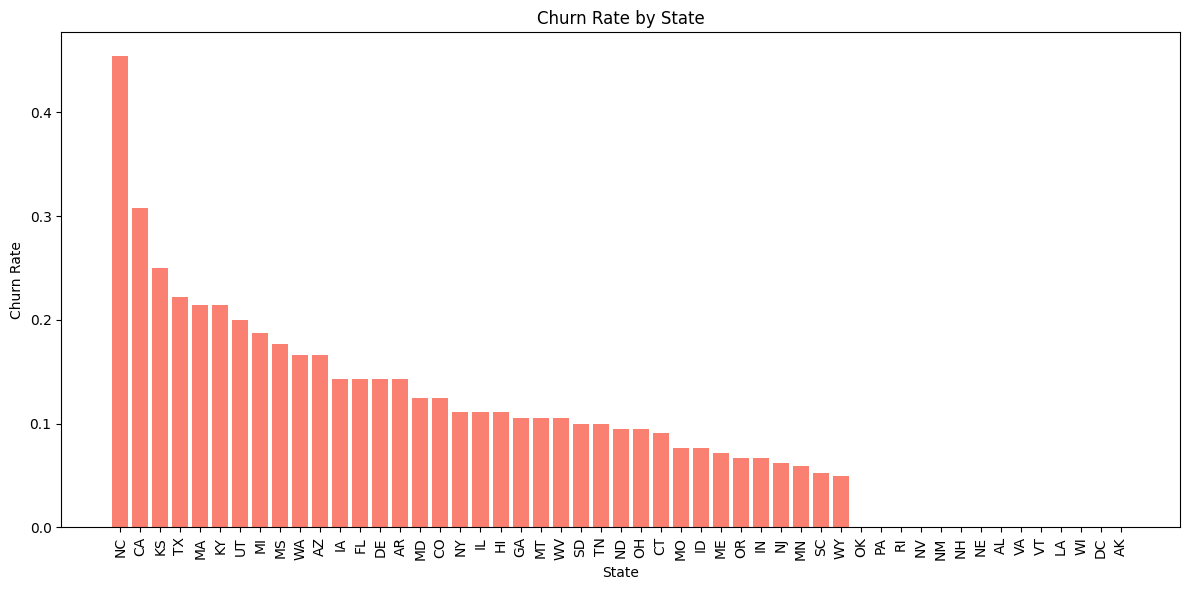

In [35]:
# Convert 'churn' column to numeric values (1 for 'yes' and 0 for 'no')
final_df['churn'] = final_df['churn'].map({'yes': 1, 'no': 0})

# Calculate churn rate by state
churn_by_state = final_df.groupby('state')['churn'].mean()

# Sort the states by churn rate (descending order)
churn_by_state = churn_by_state.sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(churn_by_state.index, churn_by_state, color='salmon')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by State')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

Here are the conclusions we can draw from the analysis of churn rates by state and the corresponding retention strategies we can consider:

- **Identify High-Churn States**: We have identified states with the highest churn rates. These states require more focused attention and targeted retention efforts.

- **Customer Demographics**: We should investigate if there are any demographic factors associated with the high-churn states. For example, are these states predominantly urban or rural, with specific age groups, income levels, or education levels? Understanding the demographics can help us tailor retention strategies accordingly.

- **Competitor Analysis**: We need to explore if there are any regional competitors with more attractive offers or services. Offering competitive plans or exclusive deals in these regions might help retain customers.

- **Customer Support**: We should analyze customer support data in high-churn states. Are there any complaints or issues that are more prevalent in these areas? Improving customer support services in these states can make a significant impact on customer satisfaction.

- **Localized Marketing Campaigns**: We can consider running localized marketing campaigns to address specific needs or interests of customers in different states. Personalized and targeted promotions can enhance customer engagement and loyalty.

### 2.2 account_length

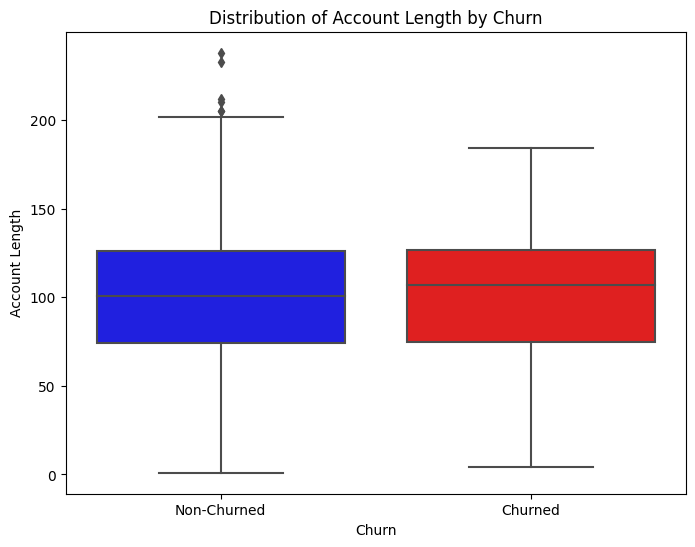

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot to visualize the distribution of account length for churned and non-churned customers
plt.figure(figsize=(8, 6))
sns.boxplot(data=final_df, x='churn', y='account_length', palette=['blue', 'red'])
plt.title('Distribution of Account Length by Churn')
plt.xlabel('Churn')
plt.ylabel('Account Length')
plt.xticks(ticks=[0, 1], labels=['Non-Churned', 'Churned'])

plt.show()

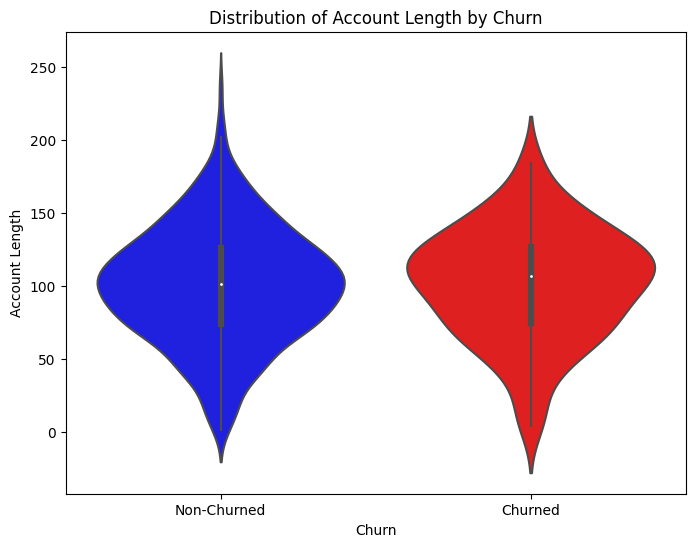

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a violin plot to visualize the distribution of account length for churned and non-churned customers
plt.figure(figsize=(8, 6))
sns.violinplot(data=final_df, x='churn', y='account_length', palette=['blue', 'red'])
plt.title('Distribution of Account Length by Churn')
plt.xlabel('Churn')
plt.ylabel('Account Length')
plt.xticks(ticks=[0, 1], labels=['Non-Churned', 'Churned'])

plt.show()

No relevant highlights

### 2.2 area_code

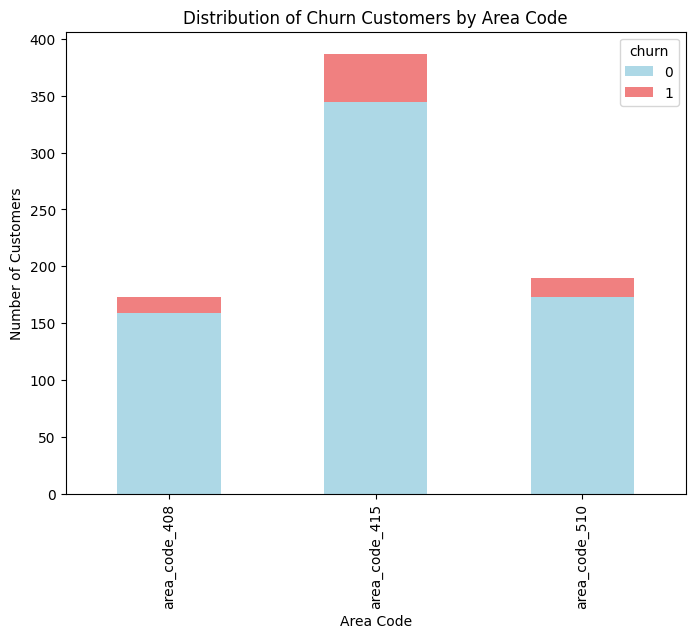

In [38]:
# Group the data by area_code and churn, and calculate the number of customers in each category
area_code_counts = final_df.groupby(['area_code', 'churn']).size().unstack()

# Create a bar plot to visualize the distribution of churn customers across different area codes
area_code_counts.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'], figsize=(8, 6))

# Add labels and title
plt.xlabel('Area Code')
plt.ylabel('Number of Customers')
plt.title('Distribution of Churn Customers by Area Code')

# Show the plot
plt.show()

No relevant highlights

### 2.3 International Plan

International Plan: Investigate whether having an international plan has an impact on churn. We can analyze the churn rate for customers with and without an international plan and see if there are significant differences.

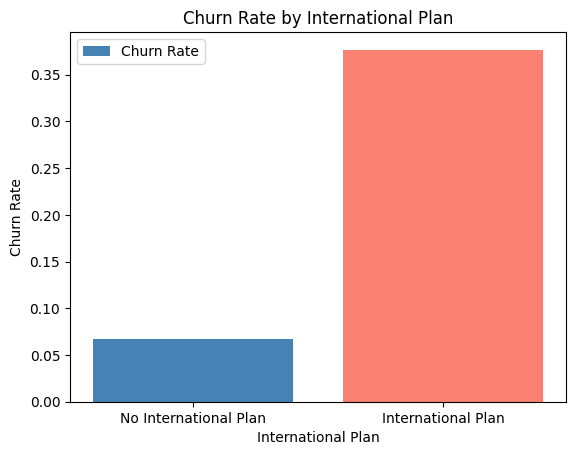

In [39]:
# Convert 'churn' column to numeric
final_df['churn'] = final_df['churn'].replace({'no': 0, 'yes': 1}).astype(int)

# Group by 'international_plan' and calculate the churn rate
churn_by_international_plan = final_df.groupby('international_plan')['churn'].mean()

# Define the colors for the bars
colors = ['steelblue', 'salmon']

# Create the bar plot with custom colors
plt.bar(['No International Plan', 'International Plan'], churn_by_international_plan, color=colors)

# Add labels and title
plt.xlabel('International Plan')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by International Plan')

# Add legend
plt.legend(labels=['Churn Rate'])

# Show the plot
plt.show()

Based on the plotted graph, we can conclude that customers with an international plan have a significantly higher churn rate compared to customers without an international plan. This suggests that having an international plan may be a contributing factor to customer churn.

To develop a strategy to retain customers with an international plan, we could consider the following approaches:

- **Improve the Value of International Plan**: Evaluate the features and benefits of the international plan you offer. Identify areas where we can enhance the value proposition, such as offering competitive international calling rates, roaming benefits, or exclusive international offers. Make sure the international plan provides significant value to customers, which can increase their satisfaction and reduce the likelihood of churn.

- **Personalized Communication**: Implement targeted communication strategies to engage with customers who have an international plan. Send personalized messages to highlight the benefits and value they receive with the plan. This can include exclusive offers, discounts on international services, or customized recommendations based on their usage patterns. Personalized communication helps to make customers feel valued and can increase their loyalty to our services.

- **Retention Offers**: Consider offering special incentives or retention offers to customers who are considering cancelling their international plan or have already expressed an intention to churn. This could include discounted rates, additional international minutes, or bonus data for a limited period. These offers can provide an extra incentive for customers to stay with our service and reduce the likelihood of churn.

- **Proactive Customer Support**: Provide proactive customer support to address any concerns or issues faced by customers with an international plan. Offer dedicated support channels for international plan users, such as a dedicated helpline or chat support, to address their queries or problems effectively. Promptly resolving customer issues and providing exceptional support can enhance their satisfaction and loyalty.

- **Regular Plan Evaluation**: Continuously evaluate and update our international plan offerings based on customer feedback, market trends, and competitive analysis. Regularly review the pricing, features, and benefits of the plan to ensure it remains attractive and competitive in the market. By keeping our international plan up-to-date and aligned with customer needs, we can enhance customer satisfaction and reduce churn.

### 2.4 voice_mail_plan

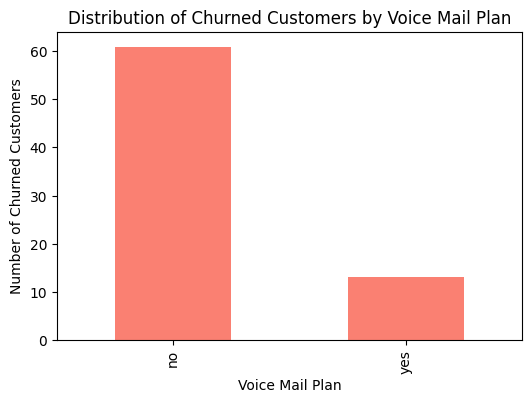

In [40]:
# Filter the DataFrame to include only churned customers
churned_customers = final_df[final_df['churn'] == 1]

# Count the number of churned customers for each voice_mail_plan status
churn_counts = churned_customers['voice_mail_plan'].value_counts()

# Create a bar plot to visualize the distribution of churned customers by voice_mail_plan status
plt.figure(figsize=(6, 4))
churn_counts.plot(kind='bar', color='salmon')

# Add labels and title
plt.xlabel('Voice Mail Plan')
plt.ylabel('Number of Churned Customers')
plt.title('Distribution of Churned Customers by Voice Mail Plan')

# Show the plot
plt.show()

Based on the analysis of churned customers with and without a voice mail plan, we can make the following conclusions:

1. **Churned Customers without Voice Mail Plan**: Approximately 60 churned customers do not have a voice mail plan. This suggests that customers who do not use the voice mail service are more likely to churn.

2. **Churned Customers with Voice Mail Plan**: Approximately 15 churned customers have a voice mail plan. While this number is lower compared to customers without a voice mail plan, it still indicates that some customers with a voice mail plan are also churning.

Retention Strategies for Churned Customers:
- **Encourage Voice Mail Usage**: We should promote the use of the voice mail service to churned customers who do not have a voice mail plan. Highlight the benefits of having voice mail, such as not missing important messages and staying connected with friends, family, and business contacts.
- **Improve Voice Mail Service**: For churned customers who already have a voice mail plan, we should ensure that the service is user-friendly, reliable, and meets their communication needs. Address any reported issues promptly to improve overall customer satisfaction.
- **Personalized Offers**: We can provide personalized offers, such as discounted voice mail plans or additional voice mail features, to entice churned customers back to our service.
- **Customer Feedback**: Gather feedback from churned customers who had a voice mail plan but still decided to leave. Understanding their reasons for churning will help us identify areas for improvement and make necessary changes to reduce churn.

By focusing on these strategies tailored to churned customers, we aim to improve customer retention and reduce churn among this specific group of users.

### 2.5 number_vmail_messages

Analyze the number of voice mail messages sent by customers and its relationship with churn. Determine if customers who use voice mail more frequently are more or less likely to churn.

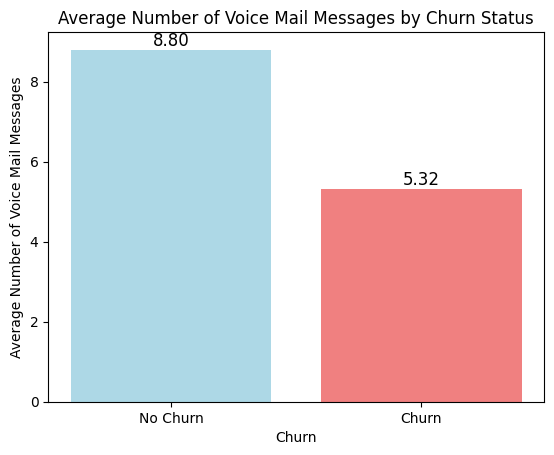

In [41]:
# Calculate the average number of voice mail messages for churn and no churn customers
avg_vmail_messages_by_churn = final_df.groupby('churn')['number_vmail_messages'].mean()

# Define the colors for the bars
colors = ['lightblue', 'lightcoral']

# Create the bar plot with custom colors
plt.bar(avg_vmail_messages_by_churn.index, avg_vmail_messages_by_churn, color=colors)

# Add labels and title
plt.xlabel('Churn')
plt.ylabel('Average Number of Voice Mail Messages')
plt.title('Average Number of Voice Mail Messages by Churn Status')

# Set the x-ticks to show only 'Churn' and 'No Churn'
plt.xticks(avg_vmail_messages_by_churn.index, ['No Churn', 'Churn'])

# Add labels to the bars
for i, v in enumerate(avg_vmail_messages_by_churn):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()

When dealing with churn customers, the goal is to address their pain points and concerns to encourage them to stay with our service. Here are some targeted retention strategies:

- **Personalized Outreach**: Identify churn customers who have shown some interest in voice mail messages in the past but have reduced their usage recently. Reach out to them with personalized messages, highlighting the benefits of voice mail and how it can enhance their communication experience. Offer special incentives or discounts to encourage them to start using voice mail again.

- **Customer Feedback and Support**: Conduct targeted surveys or feedback sessions with churn customers who rarely or never used voice mail. Understand the reasons behind their lack of usage, whether it's due to usability issues, lack of awareness, or other concerns. Based on their feedback, make improvements to the voice mail service and communicate the changes to win back their trust.

- **Onboarding and Training:** For new customers who churned shortly after signing up, provide comprehensive onboarding and training materials that include the value and usage of voice mail. Ensure they understand how to access and use the feature effectively, reducing any potential barriers to adoption.

- **Retention Offers**: Offer exclusive retention offers to customers who have churned but were active voice mail users. These offers can be tailored to their usage patterns and preferences, making them feel valued and appreciated.

- **Reminders and Alerts**: Implement automated reminders and alerts for churn customers who have voice mail enabled but have not used it recently. These reminders can be sent via email or SMS, prompting them to check their voice mail messages and stay connected.

- **Loyalty Programs**: Implement a loyalty program for churn customers that rewards them for consistent voice mail usage. Offer incentives such as free voice mail upgrades, bonus minutes, or exclusive rewards for staying engaged with the feature.

- **Customer Success Managers**: Assign dedicated customer success managers to churn customers who were frequent voice mail users. These managers can reach out personally, understand their needs, and offer proactive support to ensure they have a seamless voice mail experience.

- **Win-Back Campaigns**: Periodically run win-back campaigns specifically targeting churn customers who were avid voice mail users in the past. Tailor the messaging to remind them of the benefits of voice mail and the value it brings to their communication needs.

By implementing these targeted and personalized retention strategies for churn customers, we aim to demonstrate the value of our voice mail service and re-engage them, ultimately reducing churn rates and improving overall customer retention.

### 2.6 total_day_minutes

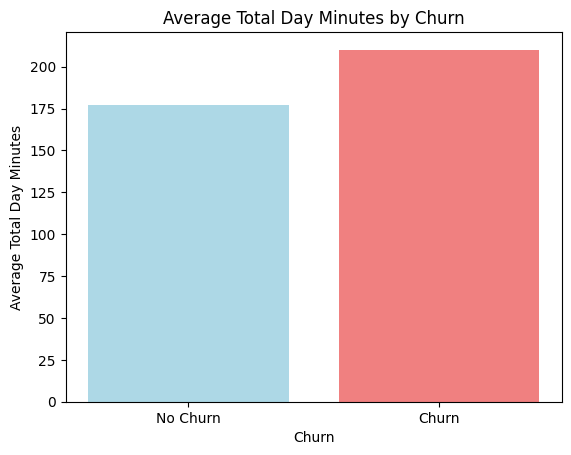

In [42]:
# Calculate the average total day minutes for churned and non-churned customers
avg_total_day_minutes = final_df.groupby('churn')['total_day_minutes'].mean()

# Define the colors for the bars
colors = ['lightblue', 'lightcoral']

# Create the bar plot with custom colors
plt.bar(['No Churn', 'Churn'], avg_total_day_minutes, color=colors)

# Add labels and title
plt.xlabel('Churn')
plt.ylabel('Average Total Day Minutes')
plt.title('Average Total Day Minutes by Churn')

# Show the plot
plt.show()

### 2.7 total_day_calls



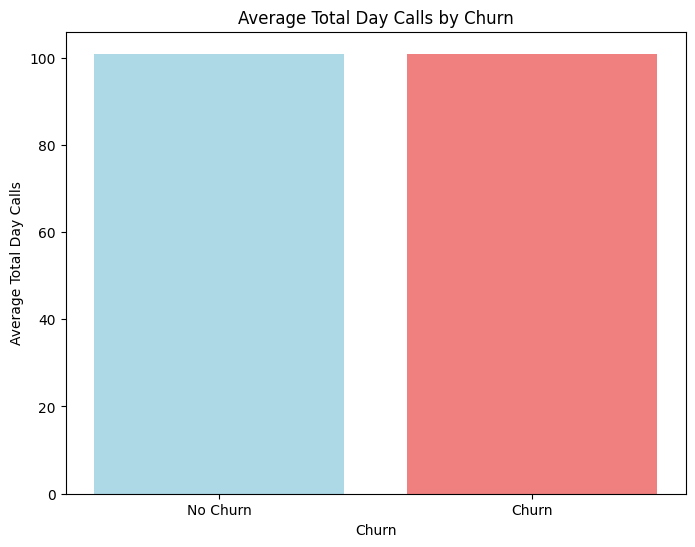

In [43]:
import matplotlib.pyplot as plt

# Create a bar plot for total_day_calls with churned customers on the right side
plt.figure(figsize=(8, 6))
plt.bar(['No Churn', 'Churn'], [final_df[final_df['churn'] == 0]['total_day_calls'].mean(), final_df[final_df['churn'] == 1]['total_day_calls'].mean()], color=['lightblue', 'lightcoral'])
plt.xlabel('Churn')
plt.ylabel('Average Total Day Calls')
plt.title('Average Total Day Calls by Churn')

# Show the plot
plt.show()


### 2.8 total_day_charge

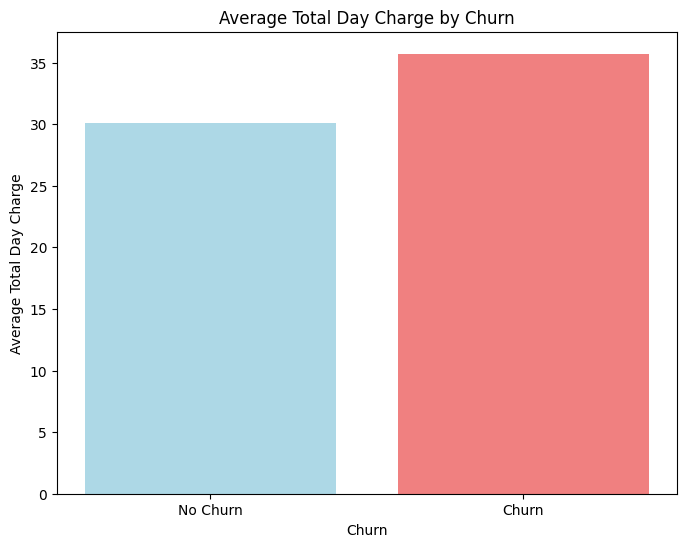

In [44]:
# Calculate the average total_day_charge for churn and no churn customers
avg_total_day_charge_churn = final_df[final_df['churn'] == 1]['total_day_charge'].mean()
avg_total_day_charge_no_churn = final_df[final_df['churn'] == 0]['total_day_charge'].mean()

# Create a bar plot to visualize the average total_day_charge for churn and no churn customers
plt.figure(figsize=(8, 6))
plt.bar(['No Churn', 'Churn'], [avg_total_day_charge_no_churn, avg_total_day_charge_churn], color=['lightblue', 'lightcoral'])

# Add labels and title
plt.xlabel('Churn')
plt.ylabel('Average Total Day Charge')
plt.title('Average Total Day Charge by Churn')

# Show the plot
plt.show()

#### Test of Statistical Significance for day calls

In [45]:
# Map the 'churn' column correctly to 'yes' and 'no'
final_df['churn'] = final_df['churn'].map({0: 'no', 1: 'yes'})

# Verify unique values in the 'churn' column after mapping
print("Unique values in 'churn' column:", final_df['churn'].unique())

# Separate churned and non-churned customers and check their counts
churned_customers = final_df[final_df['churn'] == 'yes']
non_churned_customers = final_df[final_df['churn'] == 'no']

print("Churned Customers:", churned_customers.shape[0])
print("Non-Churned Customers:", non_churned_customers.shape[0])

Unique values in 'churn' column: ['no' 'yes']
Churned Customers: 74
Non-Churned Customers: 676


In [46]:
from scipy import stats

# Extract the 'total_day_minutes' and 'total_day_calls' for churned and non-churned customers
churned_day_minutes = churned_customers['total_day_minutes']
non_churned_day_minutes = non_churned_customers['total_day_minutes']

churned_day_calls = churned_customers['total_day_calls']
non_churned_day_calls = non_churned_customers['total_day_calls']

# Perform the T-test for day minutes
t_statistic_minutes, p_value_minutes = stats.ttest_ind(churned_day_minutes, non_churned_day_minutes, equal_var=False)

# Perform the T-test for day calls
t_statistic_calls, p_value_calls = stats.ttest_ind(churned_day_calls, non_churned_day_calls, equal_var=False)

# Print the T-statistic and P-value for day minutes
print("Day Minutes - T-Statistic:", t_statistic_minutes)
print("Day Minutes - P-Value:", p_value_minutes)

# Print the T-statistic and P-value for day calls
print("Day Calls - T-Statistic:", t_statistic_calls)
print("Day Calls - P-Value:", p_value_calls)

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-values are less than the significance level for both day minutes and day calls
if p_value_minutes < alpha:
    print("The difference in average day minutes between churned and non-churned customers is statistically significant.")
else:
    print("The difference in average day minutes between churned and non-churned customers is not statistically significant.")

if p_value_calls < alpha:
    print("The difference in average day calls between churned and non-churned customers is statistically significant.")
else:
    print("The difference in average day calls between churned and non-churned customers is not statistically significant.")



Day Minutes - T-Statistic: 3.852899002150717
Day Minutes - P-Value: 0.00023266490510503578
Day Calls - T-Statistic: 0.06953806901942015
Day Calls - P-Value: 0.9447186913556791
The difference in average day minutes between churned and non-churned customers is statistically significant.
The difference in average day calls between churned and non-churned customers is not statistically significant.


### 2.9 total_eve_minutes

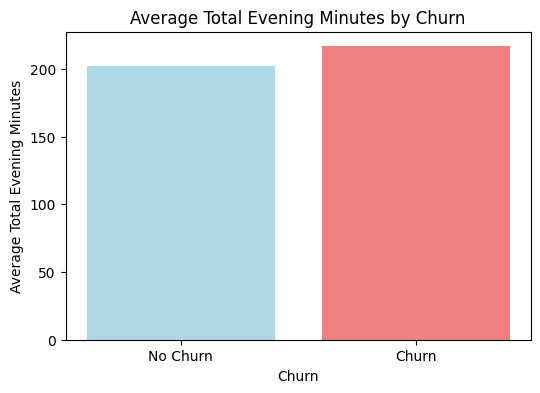

In [47]:
# Calculate the average total evening minutes for churned and no churned customers
avg_total_eve_minutes_churned = final_df[final_df['churn'] == 'yes']['total_eve_minutes'].mean()
avg_total_eve_minutes_no_churn = final_df[final_df['churn'] == 'no']['total_eve_minutes'].mean()

# Create a bar plot to compare the average total evening minutes for churned and no churned customers
plt.figure(figsize=(6, 4))
plt.bar(['No Churn', 'Churn'], [avg_total_eve_minutes_no_churn, avg_total_eve_minutes_churned], color=['lightblue', 'lightcoral'])
plt.xlabel('Churn')
plt.ylabel('Average Total Evening Minutes')
plt.title('Average Total Evening Minutes by Churn')
plt.show()

### 2.10 total_eve_calls

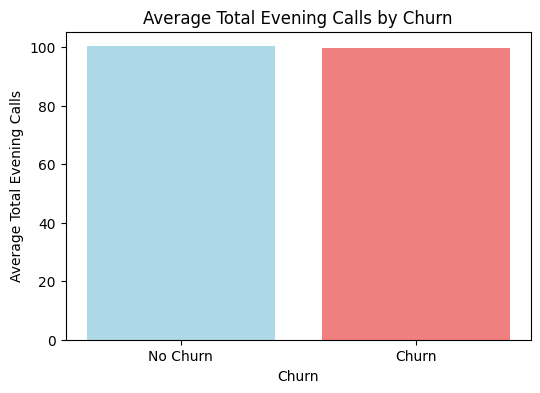

In [48]:
# Calculate the average total evening calls for churned and no churned customers
avg_total_eve_calls_churned = final_df[final_df['churn'] == 'yes']['total_eve_calls'].mean()
avg_total_eve_calls_no_churn = final_df[final_df['churn'] == 'no']['total_eve_calls'].mean()

# Create a bar plot to compare the average total evening calls for churned and no churned customers
plt.figure(figsize=(6, 4))
plt.bar(['No Churn', 'Churn'], [avg_total_eve_calls_no_churn, avg_total_eve_calls_churned], color=['lightblue', 'lightcoral'])
plt.xlabel('Churn')
plt.ylabel('Average Total Evening Calls')
plt.title('Average Total Evening Calls by Churn')
plt.show()

### 2.11 total_eve_charge

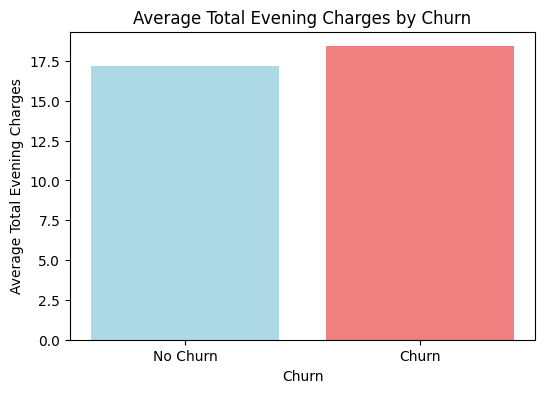

In [49]:
# Calculate the average total evening charges for churned and no churned customers
avg_total_eve_charge_churned = final_df[final_df['churn'] == 'yes']['total_eve_charge'].mean()
avg_total_eve_charge_no_churn = final_df[final_df['churn'] == 'no']['total_eve_charge'].mean()

# Create a bar plot to compare the average total evening charges for churned and no churned customers
plt.figure(figsize=(6, 4))
plt.bar(['No Churn', 'Churn'], [avg_total_eve_charge_no_churn, avg_total_eve_charge_churned], color=['lightblue', 'lightcoral'])
plt.xlabel('Churn')
plt.ylabel('Average Total Evening Charges')
plt.title('Average Total Evening Charges by Churn')
plt.show()

#### Test of Statistical Significance for evening calls

In [50]:
from scipy import stats

# Extract the 'total_eve_minutes' and 'total_eve_calls' for churned and non-churned customers
churned_eve_minutes = churned_customers['total_eve_minutes']
non_churned_eve_minutes = non_churned_customers['total_eve_minutes']

churned_eve_calls = churned_customers['total_eve_calls']
non_churned_eve_calls = non_churned_customers['total_eve_calls']

# Perform the T-test for evening minutes
t_statistic_minutes, p_value_minutes = stats.ttest_ind(churned_eve_minutes, non_churned_eve_minutes, equal_var=False)

# Perform the T-test for evening calls
t_statistic_calls, p_value_calls = stats.ttest_ind(churned_eve_calls, non_churned_eve_calls, equal_var=False)

# Print the T-statistic and P-value for evening minutes
print("Evening Minutes - T-Statistic:", t_statistic_minutes)
print("Evening Minutes - P-Value:", p_value_minutes)

# Print the T-statistic and P-value for evening calls
print("Evening Calls - T-Statistic:", t_statistic_calls)
print("Evening Calls - P-Value:", p_value_calls)

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-values are less than the significance level for both evening minutes and evening calls
if p_value_minutes < alpha:
    print("The difference in average evening minutes between churned and non-churned customers is statistically significant.")
else:
    print("The difference in average evening minutes between churned and non-churned customers is not statistically significant.")

if p_value_calls < alpha:
    print("The difference in average evening calls between churned and non-churned customers is statistically significant.")
else:
    print("The difference in average evening calls between churned and non-churned customers is not statistically significant.")

Evening Minutes - T-Statistic: 2.3281411555699107
Evening Minutes - P-Value: 0.02214992476009598
Evening Calls - T-Statistic: -0.19908593025193952
Evening Calls - P-Value: 0.8426365067004529
The difference in average evening minutes between churned and non-churned customers is statistically significant.
The difference in average evening calls between churned and non-churned customers is not statistically significant.


### 2.12 total_night_minutes

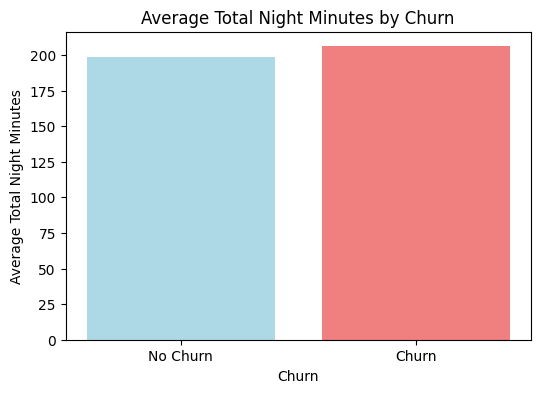

In [51]:
# Calculate the average total night minutes for churned and no churned customers
avg_total_night_minutes_churned = final_df[final_df['churn'] == 'yes']['total_night_minutes'].mean()
avg_total_night_minutes_no_churn = final_df[final_df['churn'] == 'no']['total_night_minutes'].mean()

# Create a bar plot to compare the average total night minutes for churned and no churned customers
plt.figure(figsize=(6, 4))
plt.bar(['No Churn', 'Churn'], [avg_total_night_minutes_no_churn, avg_total_night_minutes_churned], color=['lightblue', 'lightcoral'])
plt.xlabel('Churn')
plt.ylabel('Average Total Night Minutes')
plt.title('Average Total Night Minutes by Churn')
plt.show()

### 2.13 total_night_calls

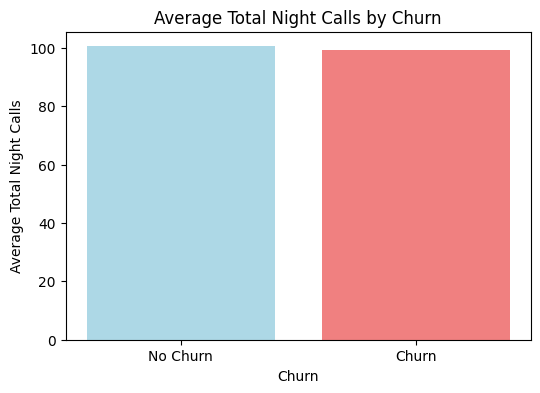

In [52]:
# Calculate the average total night calls for churned and no churned customers
avg_total_night_calls_churned = final_df[final_df['churn'] == 'yes']['total_night_calls'].mean()
avg_total_night_calls_no_churn = final_df[final_df['churn'] == 'no']['total_night_calls'].mean()

# Create a bar plot to compare the average total night calls for churned and no churned customers
plt.figure(figsize=(6, 4))
plt.bar(['No Churn', 'Churn'], [avg_total_night_calls_no_churn, avg_total_night_calls_churned], color=['lightblue', 'lightcoral'])
plt.xlabel('Churn')
plt.ylabel('Average Total Night Calls')
plt.title('Average Total Night Calls by Churn')
plt.show()

### 2.14 total_night_charge

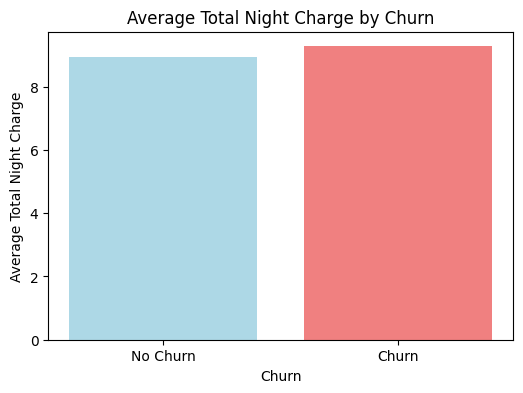

In [53]:
# Calculate the average total night charge for churned and no churned customers
avg_total_night_charge_churned = final_df[final_df['churn'] == 'yes']['total_night_charge'].mean()
avg_total_night_charge_no_churn = final_df[final_df['churn'] == 'no']['total_night_charge'].mean()

# Create a bar plot to compare the average total night charge for churned and no churned customers
plt.figure(figsize=(6, 4))
plt.bar(['No Churn', 'Churn'], [avg_total_night_charge_no_churn, avg_total_night_charge_churned], color=['lightblue', 'lightcoral'])
plt.xlabel('Churn')
plt.ylabel('Average Total Night Charge')
plt.title('Average Total Night Charge by Churn')
plt.show()

#### Test of Statistical Significance for night calls

In [54]:
from scipy import stats

# Extract the 'total_night_minutes' and 'total_night_calls' for churned and non-churned customers
churned_night_minutes = churned_customers['total_night_minutes']
non_churned_night_minutes = non_churned_customers['total_night_minutes']

churned_night_calls = churned_customers['total_night_calls']
non_churned_night_calls = non_churned_customers['total_night_calls']

# Perform the T-test for night minutes
t_statistic_minutes, p_value_minutes = stats.ttest_ind(churned_night_minutes, non_churned_night_minutes, equal_var=False)

# Perform the T-test for night calls
t_statistic_calls, p_value_calls = stats.ttest_ind(churned_night_calls, non_churned_night_calls, equal_var=False)

# Print the T-statistic and P-value for night minutes
print("Night Minutes - T-Statistic:", t_statistic_minutes)
print("Night Minutes - P-Value:", p_value_minutes)

# Print the T-statistic and P-value for night calls
print("Night Calls - T-Statistic:", t_statistic_calls)
print("Night Calls - P-Value:", p_value_calls)

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-values are less than the significance level for both night minutes and night calls
if p_value_minutes < alpha:
    print("The difference in average night minutes between churned and non-churned customers is statistically significant.")
else:
    print("The difference in average night minutes between churned and non-churned customers is not statistically significant.")

if p_value_calls < alpha:
    print("The difference in average night calls between churned and non-churned customers is statistically significant.")
else:
    print("The difference in average night calls between churned and non-churned customers is not statistically significant.")

Night Minutes - T-Statistic: 1.1301917651302131
Night Minutes - P-Value: 0.2614125999141747
Night Calls - T-Statistic: -0.6035199429196328
Night Calls - P-Value: 0.5476594196274371
The difference in average night minutes between churned and non-churned customers is not statistically significant.
The difference in average night calls between churned and non-churned customers is not statistically significant.


Based on our analysis of the average total minutes, total calls, and total charges for day, evening, and night usage, we can observe a consistent trend among churn customers. Churn customers tend to have higher average usage in terms of total minutes and total charges for all three time periods (day, evening, and night) compared to no churn customers. However, the average total calls for churn and no churn customers are approximately the same across all three time periods.

This pattern suggests that customers who are more engaged and use the services more extensively are more likely to churn. It indicates that these high-usage customers may have higher expectations or specific needs from the services they receive. If their expectations are not met or they encounter any issues, they are more inclined to switch to other providers.

To address this issue and improve customer retention, we need to focus on providing exceptional service and meeting the specific needs of these high-usage customers. Some potential retention strategies include:

1. **Personalized Offers**: Offer tailored plans or packages based on their usage patterns and preferences. Providing plans that align with their needs can enhance customer satisfaction and loyalty.

2. **Proactive Customer Support**: Implement proactive customer support to identify and resolve any issues or concerns they may have. Addressing problems promptly can significantly improve customer satisfaction and reduce churn.

3. **Loyalty Rewards**: Implement a loyalty rewards program to show appreciation to high-usage customers. Offering exclusive benefits and rewards can incentivize them to stay with our service.

4. **Communication**: Regularly communicate with these customers to keep them informed about new features, upgrades, or promotions that may be relevant to them.

5. **Customer Feedback**: Actively seek feedback from these customers to understand their needs better and make continuous improvements to our services.

By implementing these retention strategies and focusing on providing exceptional service to our high-usage customers, we can enhance their overall experience, foster loyalty, and reduce churn rates, leading to greater customer retention and satisfaction.

### 2.15 total_intl_minutes

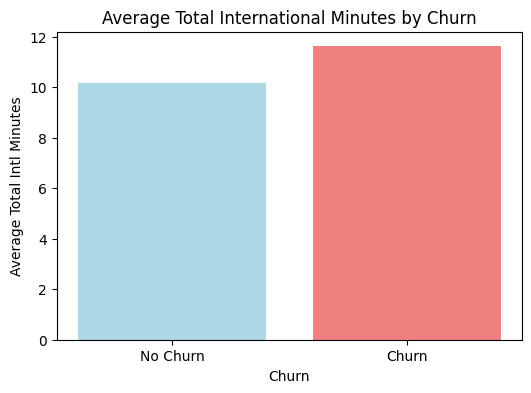

In [55]:
# Calculate the average total international minutes for churn and no churn customers
avg_intl_minutes_churn = final_df[final_df['churn'] == 'yes']['total_intl_minutes'].mean()
avg_intl_minutes_no_churn = final_df[final_df['churn'] == 'no']['total_intl_minutes'].mean()

# Create a bar plot to visualize the average total international minutes for churn and no churn customers
plt.figure(figsize=(6, 4))
plt.bar(['No Churn', 'Churn'], [avg_intl_minutes_no_churn, avg_intl_minutes_churn], color=['lightblue', 'lightcoral'])
plt.xlabel('Churn')
plt.ylabel('Average Total Intl Minutes')
plt.title('Average Total International Minutes by Churn')
plt.show()

### 2.16 total_intl_calls

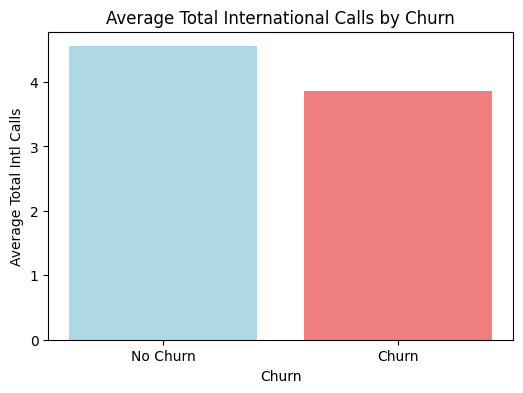

In [56]:
# Calculate the average total international calls for churn and no churn customers
avg_intl_calls_churn = final_df[final_df['churn'] == 'yes']['total_intl_calls'].mean()
avg_intl_calls_no_churn = final_df[final_df['churn'] == 'no']['total_intl_calls'].mean()

# Create a bar plot to visualize the average total international calls for churn and no churn customers
plt.figure(figsize=(6, 4))
plt.bar(['No Churn', 'Churn'], [avg_intl_calls_no_churn, avg_intl_calls_churn], color=['lightblue', 'lightcoral'])
plt.xlabel('Churn')
plt.ylabel('Average Total Intl Calls')
plt.title('Average Total International Calls by Churn')
plt.show()

### 2.17 total_intl_charge

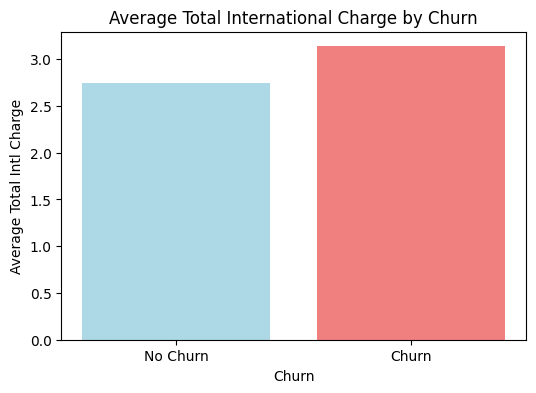

In [57]:
# Calculate the average total international charge for churn and no churn customers
avg_intl_charge_churn = final_df[final_df['churn'] == 'yes']['total_intl_charge'].mean()
avg_intl_charge_no_churn = final_df[final_df['churn'] == 'no']['total_intl_charge'].mean()

# Create a bar plot to visualize the average total international charge for churn and no churn customers
plt.figure(figsize=(6, 4))
plt.bar(['No Churn', 'Churn'], [avg_intl_charge_no_churn, avg_intl_charge_churn], color=['lightblue', 'lightcoral'])
plt.xlabel('Churn')
plt.ylabel('Average Total Intl Charge')
plt.title('Average Total International Charge by Churn')
plt.show()

#### Test of Statistical Significance for international calls

In [58]:
from scipy import stats

# Separate churned and non-churned customers
churned_customers = final_df[final_df['churn'] == 'yes']
non_churned_customers = final_df[final_df['churn'] == 'no']

# Perform the two-sample t-test
t_statistic, p_value = stats.ttest_ind(churned_customers['total_intl_minutes'], non_churned_customers['total_intl_minutes'], equal_var=False)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Check if the difference is statistically significant
if p_value < alpha:
    print("The difference in average total international minutes between churned and non-churned customers is statistically significant.")
else:
    print("The difference in average total international minutes between churned and non-churned customers is not statistically significant.")

T-Statistic: 4.3166390284599885
P-Value: 4.089306802111131e-05
The difference in average total international minutes between churned and non-churned customers is statistically significant.


Based on the analysis of total international minutes, total international calls, and total international charges, we can make the following conclusions:

1. Churn customers have a higher average of total international minutes: This suggests that churn customers tend to use international minutes more frequently, which may be indicative of their need for international communication.

2. Churn customers have a lower average of total international calls: The lower average of international calls for churn customers indicates that they may be using longer international calls, leading to higher charges per call.

3. Churn customers have a higher average of total international charges: The higher average international charges for churn customers could be a significant factor contributing to their likelihood of churning, as it indicates higher expenses associated with international communication.

Based on these conclusions, we can develop the following retention strategies:

1. **International Plans with Incentives:** Offer special international calling plans or packages to churn customers, providing them with discounted rates for international minutes. This can incentivize them to stay with our service, as they will benefit from cost savings on international calls.

2. **Promotional Offers on International Calls:** Introduce limited-time promotional offers for international calls to entice churn customers to continue using our service. These promotions could include discounted rates, bonus minutes, or free international calls for a specific period.

3. **Personalized Communication:** Reach out to churn customers individually to understand their specific international calling needs and challenges. By providing personalized solutions, we can address their concerns and offer tailored plans that meet their requirements.

4. **Improve International Call Quality:** Ensure that international calls have high voice quality and minimal disruptions. By providing a seamless international calling experience, we can enhance customer satisfaction and encourage churn customers to stay with our service.

5. **Customer Support:** Enhance customer support services to address any issues related to international calls promptly. Timely resolution of problems can build trust and loyalty among churn customers.

By implementing these retention strategies, we aim to reduce the likelihood of churn among customers who have higher international usage and charges, leading to increased customer loyalty and satisfaction.

### 2.18 number_customer_service_calls

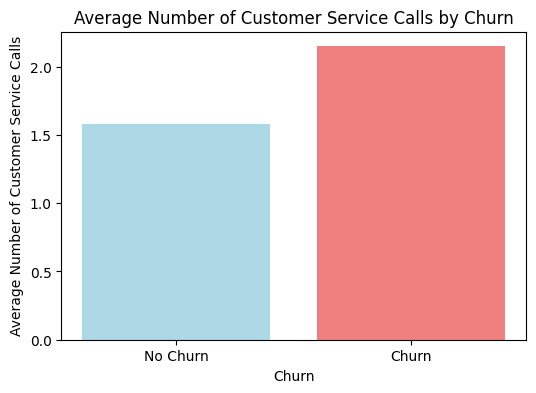

In [59]:
# Group the data by churn status and calculate the average number of customer service calls for each group
avg_service_calls = final_df.groupby('churn')['number_customer_service_calls'].mean()

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(avg_service_calls.index, avg_service_calls.values, color=['lightblue', 'lightcoral'])

# Add labels and title
plt.xlabel('Churn')
plt.ylabel('Average Number of Customer Service Calls')
plt.title('Average Number of Customer Service Calls by Churn')

# Customize x-axis labels
plt.xticks([0, 1], ['No Churn', 'Churn'])

# Show the plot
plt.show()

#### Test of Statistical Significance for customer service calls

In [60]:
from scipy import stats

# Separate churned and non-churned customers
churned_customers = final_df[final_df['churn'] == 'yes']
non_churned_customers = final_df[final_df['churn'] == 'no']

# Perform the two-sample t-test
t_statistic, p_value = stats.ttest_ind(churned_customers['number_customer_service_calls'], non_churned_customers['number_customer_service_calls'], equal_var=False)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Check if the difference is statistically significant
if p_value < alpha:
    print("The difference in average number of customer service calls between churned and non-churned customers is statistically significant.")
else:
    print("The difference in average number of customer service calls between churned and non-churned customers is not statistically significant.")

T-Statistic: 2.7697719810924424
P-Value: 0.006953569388322886
The difference in average number of customer service calls between churned and non-churned customers is statistically significant.


Based on our analysis, we can conclude that churned customers have a significantly higher average number of customer service calls compared to non-churned customers. This finding indicates that churned customers are more likely to reach out to customer service with issues or concerns, which might have contributed to their decision to leave our service.

To address this issue and reduce churn, we can implement the following retention strategies:

1. **Proactive Customer Support:** We should focus on providing proactive customer support to identify and address potential issues before they escalate. By reaching out to customers who have shown signs of dissatisfaction or have a high number of service calls, we can offer assistance and solutions to resolve their concerns promptly.

2. **Enhanced Self-Service Tools:** Implementing user-friendly self-service tools and resources can empower customers to find answers to common problems on their own. This can help reduce the need for repeated customer service calls and improve the overall customer experience.

3. **Customer Feedback Analysis:** Analyzing the content and reasons for customer service calls can provide valuable insights into the pain points and areas for improvement. By addressing these specific concerns, we can proactively resolve issues and prevent future customer service interactions related to the same problems.

4. **Customer Service Training:** We should ensure that our customer service representatives are well-trained and equipped to handle customer inquiries effectively. Improving their skills and knowledge will enhance the quality of interactions and customer satisfaction.

5. **Personalized Customer Outreach:** We can engage in personalized communication with customers who have had a high number of customer service calls. By understanding their specific needs and addressing their concerns directly, we can show that we value their feedback and are committed to providing a positive experience.

By implementing these retention strategies, we aim to reduce the number of customer service calls and improve overall customer satisfaction, which will ultimately lead to lower churn rates and increased customer loyalty.